In [1]:
# Import necessary libraries
import json
import pandas as pd

# For visualization
%matplotlib inline
import matplotlib.pyplot as plt

### Prepare Restaurant Data

In [2]:
# Generator function for businesses
def load_businesses(file_path):
    with open(file_path, 'r') as data_file:
        for line in data_file:
            business_info = json.loads(line)
            yield business_info

business_raw = pd.DataFrame(load_businesses("./yelp-dataset/yelp_academic_dataset_business.json"))

In [3]:
# Preview business data
business_raw.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [4]:
PA_mask = business_raw['state'] == 'PA'
restaurants_mask = business_raw['categories'].notna() & business_raw['categories'].str.contains('Restaurants')

In [5]:
restaurants = business_raw[PA_mask & restaurants_mask]
restaurants.reset_index(drop=True, inplace=True)
restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."


In [6]:
restaurants.shape

(12641, 14)

In [7]:
# Standardize city names
restaurants.loc[:, 'city'] = restaurants['city'].apply(lambda city: city.strip())
restaurants.loc[:, 'city'] = restaurants['city'].apply(lambda city: city.title())

In [8]:
# Confirm addresses of restaurants with unspecified city names
restaurants[restaurants['city'] == 'Pennsylvania']

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
7245,2SDa9Vc7opPT1WicNIkVXw,Texas Chicken & Burgers,"3960-80 Kensington Ave, Philadelphia",Pennsylvania,PA,19124,40.006140,-75.096110,2.0,5,1,"{'Alcohol': ''none'', 'HasTV': 'True', 'Ambien...","Restaurants, Burgers, American (Traditional), ...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ..."
11116,DcLUToAT66NboaJPrH9jCg,Lucky 7 Deli & Fried Chicken,255 Horsham Rd,Pennsylvania,PA,19044,40.144801,-75.122405,4.0,23,0,"{'RestaurantsDelivery': 'False', 'HasTV': 'Fal...","Restaurants, Delis, Sandwiches","{'Monday': '5:0-23:0', 'Tuesday': '5:0-23:0', ..."


In [9]:
def correct_city_names(name):
    match name:
        case 'Abington':
            return 'Abington Township'
        case 'Bensalem' | 'Bensalem. Pa':
            return 'Bensalem Township'
        case 'Bethel':
            return 'Bethel Township'
        case 'Bristol' | 'Bristol Twp':
            return 'Bristol Township'
        case 'Charlotte':
            return 'Philadelphia'
        case 'Cheltenham':
            return 'Cheltenham Township'
        case 'Conshohoeken':
            return 'Conshohocken'
        case 'E. Norristown':
            return 'Norristown'
        case 'Festerville':
            return 'Feasterville'
        case 'Feasterville Trevose':
            return 'Feasterville-Trevose'
        case 'Fox Street' | 'Pennsylvania' | 'Phila' | 'Philadephia' | 'Philly' | 'Southwest Philadelphia':
            return 'Philadelphia'
        case 'Glenoldan':
            return 'Glenolden'
        case 'N.Wales':
            return 'North Wales'
        case 'Newtown' | 'Newtown Sqaure' | 'Newtown Square':
            return 'Newtown Township'
        case 'St. Davids':
            return 'Saint Davids'
        case 'W.Chester' | 'West Chester Pa':
            return 'West Chester'
        case 'Warrington':
            return 'Warrington Township'
        case _:
            return name

In [10]:
restaurants.loc[:, 'city'] = restaurants['city'].apply(correct_city_names)
restaurants.loc[11116, 'city'] = 'Hatboro'

In [11]:
# sorted(restaurants['city'].unique())

In [12]:
def categories_to_list(categories):
    if categories is None:
        return []
    items = categories.split(", ")
    cat_list = [i for i in items]
    return cat_list

In [13]:
restaurants.loc[:, 'categories'] = restaurants['categories'].apply(categories_to_list)

In [14]:
restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","[Restaurants, Food, Bubble Tea, Coffee & Tea, ...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","[Sushi Bars, Restaurants, Japanese]","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","[Korean, Restaurants]","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...","[Cocktail Bars, Bars, Italian, Nightlife, Rest...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","[Pizza, Restaurants, Salad, Soup]","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."


In [15]:
restaurants.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [16]:
restaurants.describe()

,latitude,longitude,stars,review_count,is_open
count,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000
mean,40.040374,-75.231329,3.521557,83.925797,0.638320
std,0.121069,0.182647,0.796247,175.751601,0.480506
min,39.795125,-75.798695,1.000000,5.000000,0.000000
25%,39.950102,-75.317770,3.000000,14.000000,0.000000
50%,40.006335,-75.175753,3.500000,34.000000,1.000000
75%,40.120194,-75.143226,4.000000,86.000000,1.000000
max,40.449748,-74.772131,5.000000,5721.000000,1.000000


In [17]:
# Maintain set of restaurant business_ids to prune reviews
restaurant_ids = set(restaurants['business_id'])

### Exploring Restaurant Data

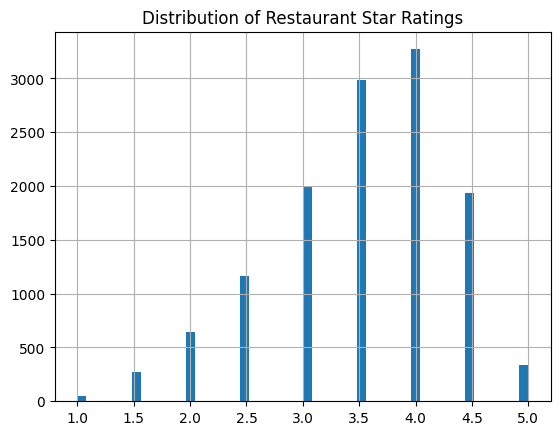

In [18]:
restaurants['stars'].hist(bins=50)
plt.title("Distribution of Restaurant Star Ratings")
plt.show()

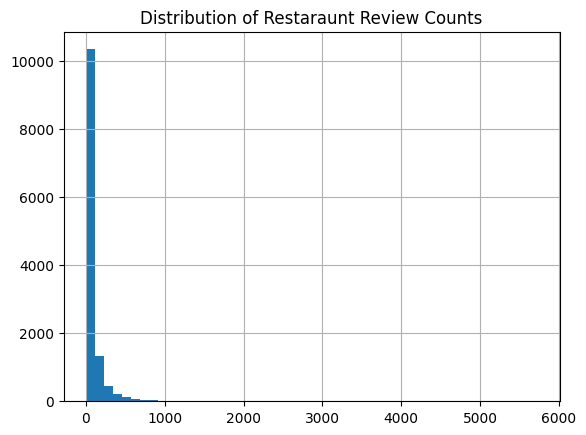

In [19]:
restaurants['review_count'].hist(bins=50)
plt.title("Distribution of Restaraunt Review Counts")
plt.show()

In [20]:
restaurants['review_count'].value_counts()[:10]

review_count
5     527
6     423
7     381
8     345
10    334
9     324
11    273
14    251
12    248
13    236
Name: count, dtype: int64

In [21]:
from collections import Counter

category_counts = Counter()

_ = restaurants['categories'].apply(lambda x: category_counts.update(x))

In [22]:
# Retrieve the top 21 categories and remove the top category
# (which will be Restaurants)
top_20_categories = category_counts.most_common(21)
del top_20_categories[0]

top_20_categories

[('Food', 3851),
 ('Sandwiches', 2151),
 ('Pizza', 2128),
 ('Nightlife', 1936),
 ('Bars', 1854),
 ('American (Traditional)', 1779),
 ('American (New)', 1539),
 ('Italian', 1433),
 ('Breakfast & Brunch', 1425),
 ('Coffee & Tea', 1124),
 ('Burgers', 983),
 ('Chinese', 918),
 ('Fast Food', 915),
 ('Event Planning & Services', 795),
 ('Seafood', 767),
 ('Mexican', 714),
 ('Delis', 708),
 ('Salad', 678),
 ('Cafes', 653),
 ('Caterers', 530)]

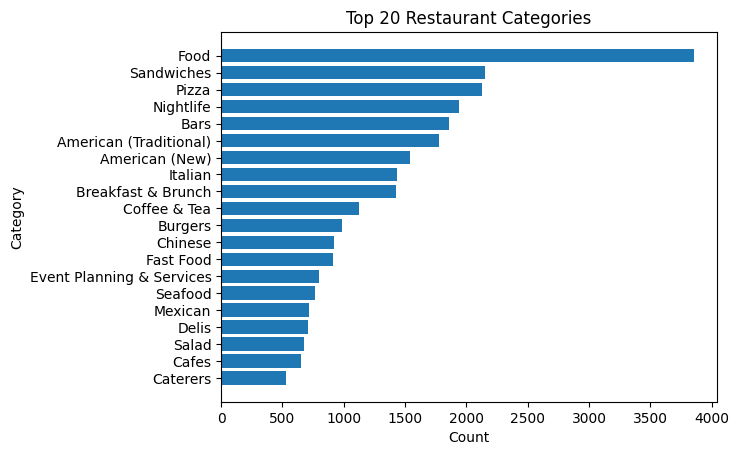

In [23]:
cat_bar_x = [x[1] for x in top_20_categories[::-1]]
cat_bar_y = [x[0] for x in top_20_categories[::-1]]

plt.barh(cat_bar_y, cat_bar_x)
plt.ylabel("Category")
plt.xlabel("Count")
plt.title("Top 20 Restaurant Categories")
plt.show()

Create KML files to plot latitude and longitude of restaurants on a map. These can be later viewed in Google Maps.

In [24]:
import os
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

if os.path.exists("restaurants_1.kml"):
    print("The restaurants KML file(s) already exist(s).")
else:
    # Convert the DataFrame to a GeoDataFrame
    geometry = [Point(xy) for xy in zip(restaurants['longitude'], restaurants['latitude'])]
    gdf = gpd.GeoDataFrame(restaurants, geometry=geometry, crs='EPSG:4326')
    
    # Split the full GeoDataFrame into smaller chunks to import on Google Maps
    num_splits = int(np.ceil(gdf.memory_usage(index=True, deep=True).sum() / (5 * 1024 * 1024)))
    
    chunks = np.array_split(gdf, num_splits)

    for i, chunk in enumerate(chunks):
        chunk.to_file(f'restaurants_{i+1}.kml', driver='KML')

The restaurants KML file(s) already exist(s).


### Prepare Restaurant Reviews

In [25]:
# Generator function for filtered reviews
def load_filtered_reviews(file_path, restaurant_ids):
    with open(file_path, 'r') as data_file:
        for line in data_file:
            review_info = json.loads(line)
            if review_info['business_id'] in restaurant_ids:
                yield review_info

# Convert the filtered data into a DataFrame
review_raw = pd.DataFrame(load_filtered_reviews('./yelp-dataset/yelp_academic_dataset_review.json', restaurant_ids))

In [26]:
# Preview review data
review_raw.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
2,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31
3,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5.0,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16
4,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0,0,0,0,Good food--loved the gnocchi with marinara\nth...,2009-10-14 19:57:14


In [27]:
review_raw.shape

(1100250, 9)

In [28]:
review_raw.describe()

,stars,useful,funny,cool
count,1.100250e+06,1.100250e+06,1.100250e+06,1.100250e+06
mean,3.745291e+00,1.081819e+00,3.468666e-01,4.873910e-01
std,1.367894e+00,2.472114e+00,1.376099e+00,1.777101e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,5.000000e+00,2.240000e+02,2.270000e+02,1.630000e+02


In [29]:
review_raw.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [30]:
# Maintain set of user_ids to prune user data
user_ids = set(review_raw['user_id'])

### Prepare Users

In [31]:
# Generator function for filtered users
def load_filtered_users(file_path, user_ids):
    with open(file_path, 'r') as data_file:
        for line in data_file:
            user_info = json.loads(line)
            if user_info['user_id'] in user_ids:
                yield user_info

# Convert the filtered data into a DataFrame
user_raw = pd.DataFrame(load_filtered_users('./yelp-dataset/yelp_academic_dataset_user.json', user_ids))

In [32]:
user_raw.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1221,2005-03-14 20:26:35,14953,9940,11211,"2006,2007,2008,2009,2010,2011,2012,2013,2014","xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",1357,...,163,191,361,147,1212,5696,2543,2543,815,323
3,AUi8MPWJ0mLkMfwbui27lg,John,109,2010-01-07 18:32:04,154,20,23,,"gy5fWeSv3Gamuq9Ox4MV4g, lMr3LWU6kPFLTmCpDkACxg...",4,...,0,0,0,0,1,6,3,3,0,0
4,1McG5Rn_UDkmlkZOrsdptg,Teresa,7,2009-05-26 16:11:11,18,3,13,,"piejMEdRkGB7-1aL4lL5NQ, X0zFOU6iG95-feQKOXkgrA...",1,...,0,0,0,0,1,0,2,2,0,0


In [31]:
user_raw.shape

(312426, 22)

In [32]:
user_raw.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [33]:
user_raw.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000
mean,35.640664,74.937905,31.636826,44.794771,2.623693,3.647673,3.284032,0.498460,0.339431,0.231799,0.126676,2.749682,5.517902,5.129791,5.129791,1.915471,2.248977
std,132.741373,1077.231636,724.201513,953.207991,33.756930,1.081002,114.556309,14.097274,20.181045,9.056863,7.820682,135.420895,222.732963,154.024955,154.024955,49.371450,136.733076
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,0.000000,0.000000,3.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.000000,1.000000,1.000000,0.000000,3.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22.000000,18.000000,4.000000,4.000000,1.000000,4.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17473.000000,206296.000000,185823.000000,199878.000000,12497.000000,5.000000,25784.000000,4347.000000,7039.000000,2974.000000,2607.000000,59031.000000,101097.000000,49967.000000,49967.000000,15934.000000,56104.000000
